# ejercicio 1

ESTADÍSTICOS - GRUPO 1
Media: 0.5030947903815657
Var: 0.08245053341134126


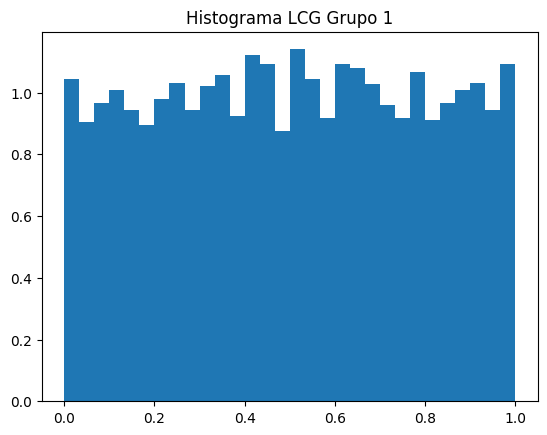

KS: 0.010832046864926809    p-value: 0.5964920104834444

ESTADÍSTICOS - GRUPO 2
Media: 0.4970913891256281
Var: 0.08381071508879635


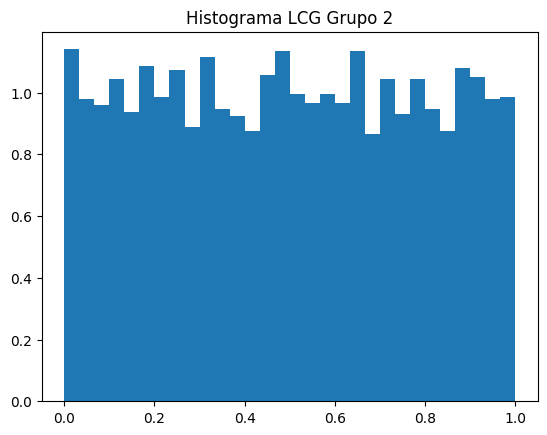

KS: 0.007975601379468844    p-value: 0.9055274752766115


In [ ]:

# EJERCICIO 1
# Generador LCG - pseudoaleatorio Uniforme(0,1)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# ---- función LCG ----
def LCG(a, c, m, seed, N):
    x = seed
    nums = []
    for _ in range(N):
        x = (a*x + c) % m
        nums.append(x/m)   # normalizamos a [0,1]
    return np.array(nums)


# PARÁMETROS GRUPO 1

m1 = 2**31
a1 = 1103515245
c1 = 12345
seed1 = 42
N = 5000

sample1 = LCG(a1,c1,m1,seed1,N)

print("ESTADÍSTICOS - GRUPO 1")
print("Media:", np.mean(sample1))
print("Var:", np.var(sample1))

# Histograma
plt.hist(sample1, bins=30, density=True)
plt.title("Histograma LCG Grupo 1")
plt.show()

# Prueba KS contra U(0,1)
stat1, p1 = kstest(sample1, 'uniform')
print("KS:", stat1, "   p-value:", p1)

# PARÁMETROS GRUPO 2

m2 = 2147483647
a2 = 16807
c2 = 0
seed2 = 15

sample2 = LCG(a2,c2,m2,seed2,N)

print("\nESTADÍSTICOS - GRUPO 2")
print("Media:", np.mean(sample2))
print("Var:", np.var(sample2))

plt.hist(sample2, bins=30, density=True)
plt.title("Histograma LCG Grupo 2")
plt.show()

stat2, p2 = kstest(sample2, 'uniform')
print("KS:", stat2, "   p-value:", p2)


# Ejercicio 2

ESTADÍSTICOS - Mersenne Twister
Media: 0.5028080064756697
Var: 0.08128635309129845


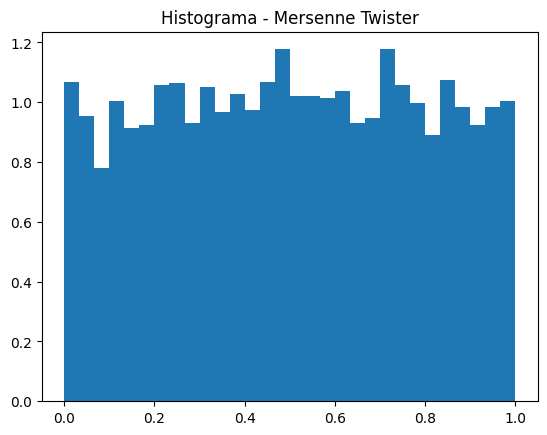

KS: 0.013095470715386415   p-value: 0.3548086009833509


In [ ]:

# EJERCICIO 2
# Mersenne Twister - Uniforme(0,1)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

N = 5000

# numpy ya usa MT
np.random.seed(2025)
sample_mt = np.random.rand(N)

print("ESTADÍSTICOS - Mersenne Twister")
print("Media:", np.mean(sample_mt))
print("Var:", np.var(sample_mt))

plt.hist(sample_mt, bins=30, density=True)
plt.title("Histograma - Mersenne Twister")
plt.show()

stat_mt, p_mt = kstest(sample_mt, 'uniform')
print("KS:", stat_mt, "  p-value:", p_mt)
